## What is Perceptron

- He proposed a Perceptron learning rule based on the original MCP neuron. 

- A Perceptron is an algorithm for supervised learning of binary classifiers. 

- This algorithm enables neurons to learn and processes elements in the training set one at a time.

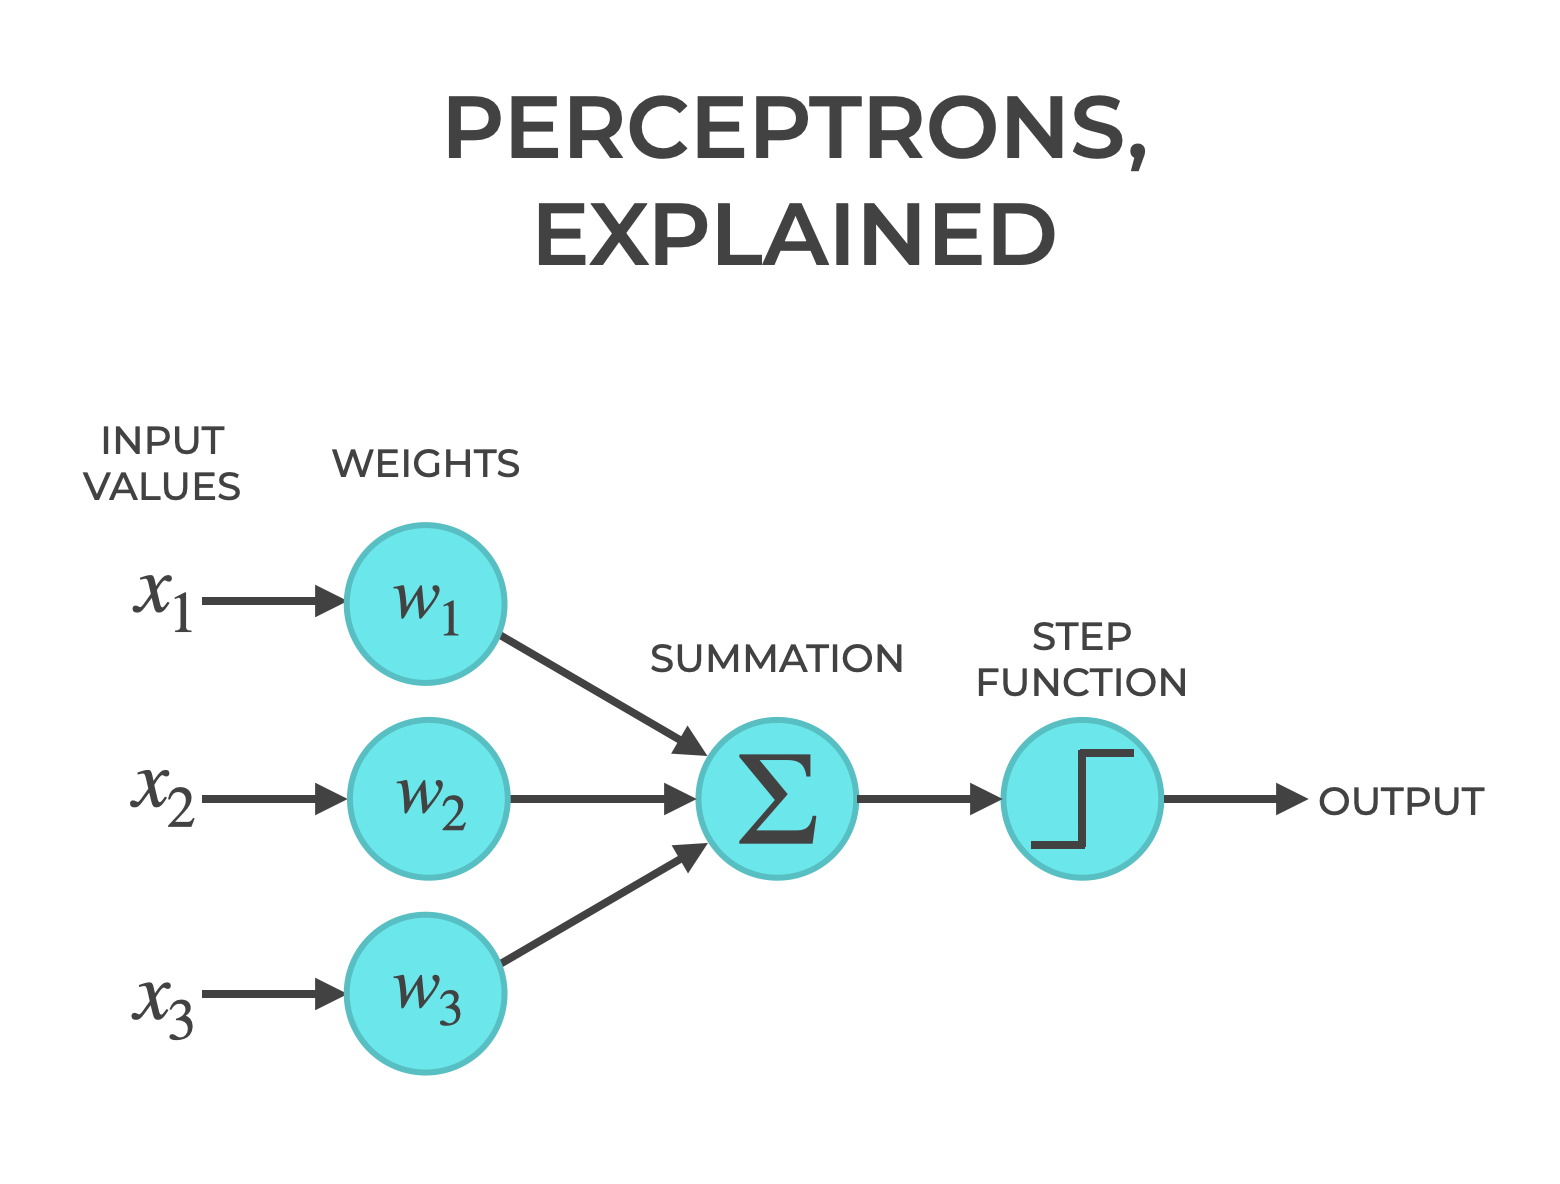

## Basic Components

- Input Layer: 
  
  - The input layer consists of one or more input neurons, which receive input signals from the external world or from other layers of the neural network.

- Weights: 
  
  - Each input neuron is associated with a weight, which represents the strength of the connection between the input neuron and the output neuron.

- Bias: 
  
  - A bias term is added to the input layer to provide the perceptron with additional flexibility in modeling complex patterns in the input data.

- Activation Function: 
  
  - The activation function determines the output of the perceptron based on the weighted sum of the inputs and the bias term. Common activation functions used in perceptrons include the step function, sigmoid function, and ReLU function.

- Output: 
  
  - The output of the perceptron is a single binary value, either 0 or 1, which indicates the class or category to which the input data belongs.

- Training Algorithm: 
  
  - The perceptron is typically trained using a supervised learning algorithm such as the perceptron learning algorithm or backpropagation. 
  
  - During training, the weights and biases of the perceptron are adjusted to minimize the error between the predicted output and the true output for a given set of training examples.



## Types of Perceptron

- Single layer: 
  
  - Single layer perceptron can learn only linearly separable patterns.

- Multilayer: 
  
  - Multilayer perceptrons can learn about two or more layers having a greater processing power.

## Working

- Perceptron is considered a single-layer neural link with four main parameters. 
- The perceptron model begins with multiplying all input values and their weights, then adds these values to create the weighted sum. 
- Further, this weighted sum is applied to the activation function ‘f’ to obtain the desired output. 
- This activation function is also known as the step function and is represented by ‘f.’

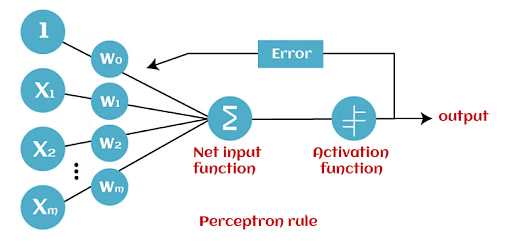


- This step function or Activation function is vital in ensuring that output is mapped between (0,1) or (-1,1). Take note that the weight of input indicates a node’s strength. Similarly, an input value gives the ability the shift the activation function curve up or down.

- Step 1: Multiply all input values with corresponding weight values and then add to calculate the weighted sum. The following is the mathematical expression of it:

```
∑wi*xi = x1*w1 + x2*w2 + x3*w3+……..x4*w4
```

Add a term called bias ‘b’ to this weighted sum to improve the model’s performance.

- Step 2:  An activation function is applied with the above-mentioned weighted sum giving us an output either in binary form or a continuous value as follows:

```
Y=f(∑wi*xi + b)
```

## Advantages:

- A multi-layered perceptron model can solve complex non-linear problems.

- It works well with both small and large input data.

- Helps us to obtain quick predictions after the training.

- Helps us obtain the same accuracy ratio with big and small data.

## Disadvantages:

- In multi-layered perceptron model, computations are time-consuming and complex.

- It is tough to predict how much the dependent variable affects each independent variable.

- The model functioning depends on the quality of training.

## Limitation of Perceptron Model 

- The output of a perceptron can only be a binary number (0 or 1) due to the hard-edge transfer function. 

- It can only be used to classify the linearly separable sets of input vectors. 

- If the input vectors are non-linear, it is not easy to classify them correctly.

## Activation Functions

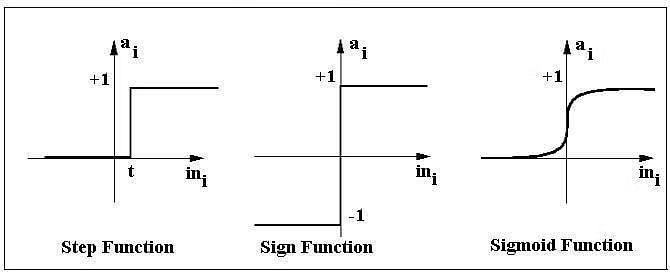

## Example

## Example - 1


[Desmos](https://www.desmos.com/calculator)

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from mlxtend.plotting import plot_decision_regions


In [18]:
df = pd.read_csv('placement.csv')
print(df.shape)
df.head()

(100, 3)


,cgpa,resume_score,placed
0,8.14,6.52,1
1,6.17,5.17,0
2,8.27,8.86,1
3,6.88,7.27,1
4,7.52,7.30,1


<Axes: xlabel='cgpa', ylabel='resume_score'>

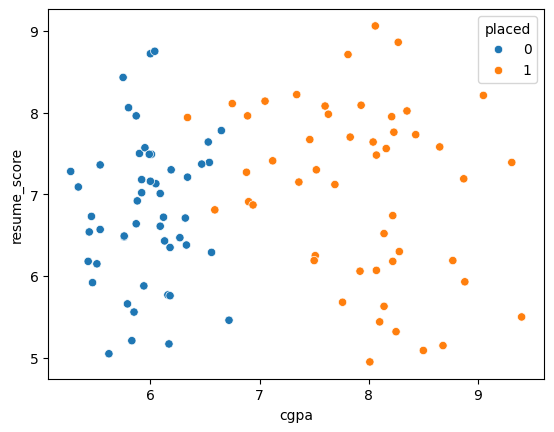

In [25]:
sns.scatterplot(x=df['cgpa'], y=df['resume_score'], hue=df['placed'])

In [26]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]
p = Perceptron()
p.fit(X,y)
p.coef_

array([[ 40.26, -36.  ]])

In [27]:
p.intercept_

array([-25.])

/home/fti-sbargule/.local/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


<Axes: >

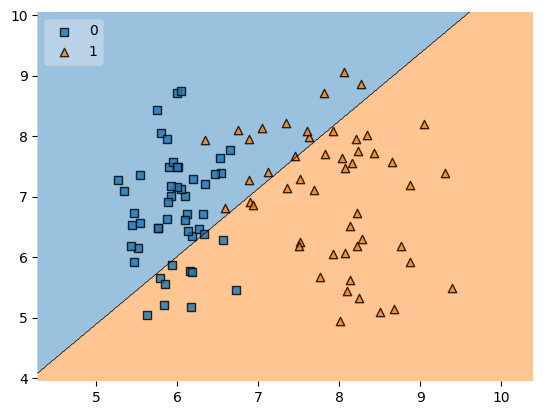

In [28]:
plot_decision_regions(X.values, y.values, clf=p, legend=2)

## Example - 2

In [39]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

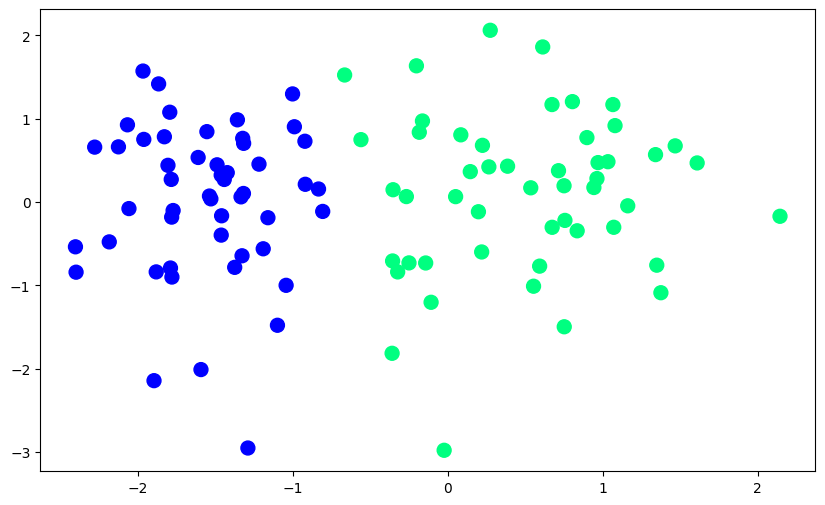

In [42]:
X, y = make_classification(n_samples=100, \
                           n_features=2, \
                           n_informative=1, \
                           n_redundant=0, \
                           n_classes=2,
                           n_clusters_per_class=1, \
                           random_state=41, \
                           hypercube=False, \
                           class_sep=10)

plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [34]:
def perceptron(X,y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
    return weights[0],weights[1:]

def step(z):
    return 1 if z>0 else 0

In [37]:
intercept_,coef_ = perceptron(X,y)

m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

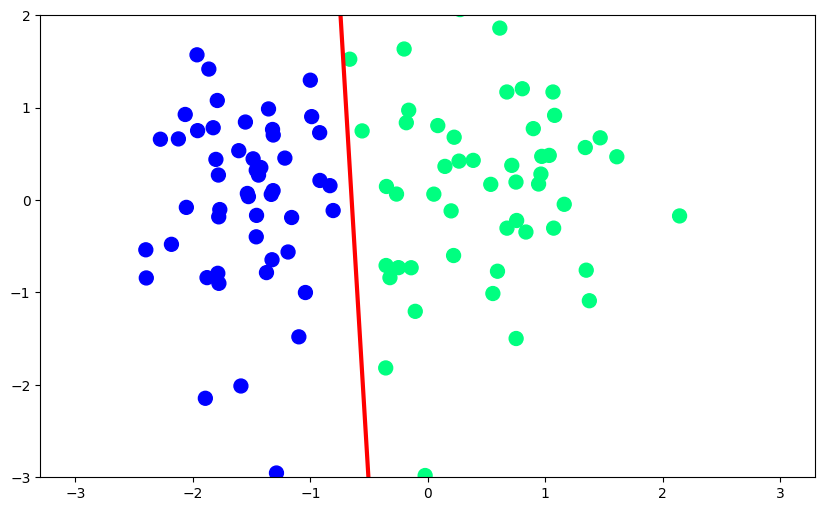

In [38]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)